In [1]:
# Importando as Bibliotecas para utilização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fazendo a Leitura dos arquivos com o pandas
labels_data = pd.read_csv('/content/labels.csv')
satelite_pos = pd.read_csv('/content/satellite_pos.csv')
sunspot = pd.read_csv('/content/sunspots.csv')
solar_wind_data = pd.read_csv('/content/solar_wind.csv')

In [3]:
# Definindo valores e colunas padrões
labels_data.timedelta = pd.to_timedelta(labels_data.timedelta)
labels_data.set_index(["period", "timedelta"], inplace=True)

sunspot.timedelta = pd.to_timedelta(sunspot.timedelta)
sunspot.set_index(["period", "timedelta"], inplace=True)

solar_wind_data.timedelta = pd.to_timedelta(solar_wind_data.timedelta)
solar_wind_data.set_index(["period", "timedelta"], inplace=True)

# Exploração dos dados

In [4]:
# Print de linhas e colunas totais de cada Dataframe
print('Tamanho DST: ',labels_data.shape)
print('Tamanho pos_satelite: ',satelite_pos.shape)
print('Tamanho mancha solar: ',sunspot.shape)
print('Tamanho ventos solares: ',solar_wind_data.shape)

Tamanho DST:  (139872, 1)
Tamanho pos_satelite:  (5828, 8)
Tamanho mancha solar:  (192, 1)
Tamanho ventos solares:  (8392320, 15)


###Labels

In [5]:
# Prévia dos dados labels
labels_data.head()

dst
period  timedelta           
train_a 0 days 00:00:00   -7
        0 days 01:00:00  -10
        0 days 02:00:00  -10
        0 days 03:00:00   -6
        0 days 04:00:00   -2

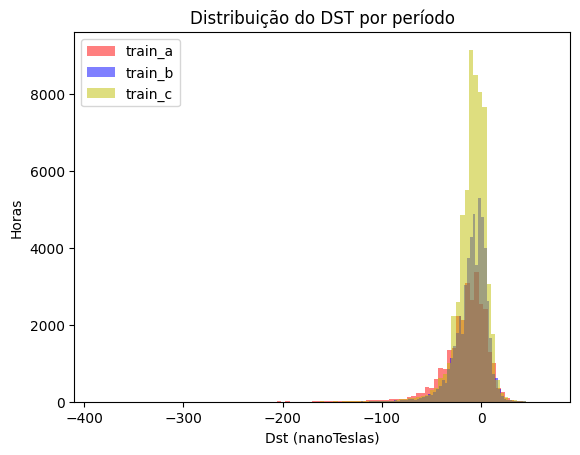

In [6]:
# Gerando um Histograma
fig, ax = plt.subplots()
colors = ["r", "b", "y"] #Definindo as cores

for i, period in enumerate(labels_data.groupby("period")):
    period_name, df = period
    ax.hist(df, alpha=0.5, color=colors[i], bins=100, label=period_name)

plt.legend()
plt.title("Distribuição do DST por período")
ax.set_xlabel("Dst (nanoTeslas)")
ax.set_ylabel("Horas")
plt.show()


In [7]:
# Agrupando por 'period' e gerando descrições após agrupar
labels_data.groupby('period').describe()

dst                                                    
           count       mean        std    min   25%   50%  75%   max
period                                                              
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

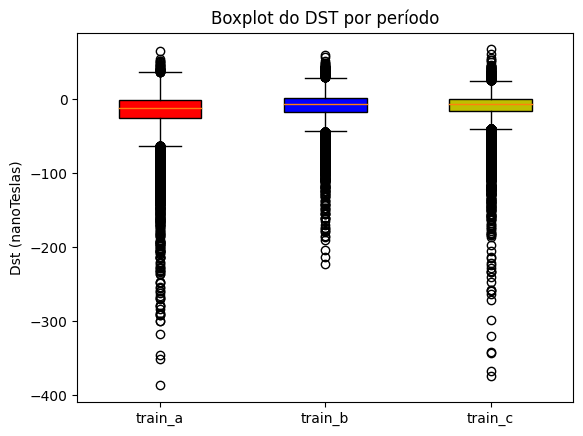

In [8]:
# Fazendo um boxplot
fig, ax = plt.subplots()
color = ["r", "b", "y"]
for i, period in enumerate(labels_data.groupby("period")):
    period_name, df = period
    ax.boxplot(df, positions=[i], widths=[0.5], patch_artist=True, boxprops=dict(facecolor=color[i]))
plt.xticks([0, 1, 2], ["train_a", "train_b", "train_c"])
plt.title("Boxplot do DST por período")
ax.set_ylabel("Dst (nanoTeslas)")
plt.show()

###Solar_wind

In [9]:
# Prévia do DataFrame Solar wind
solar_wind_data.head()

bx_gse  by_gse  bz_gse  theta_gse  phi_gse  bx_gsm  \
period  timedelta                                                             
train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   -5.55   
        0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   -5.58   
        0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   -5.15   
        0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17   -5.20   
        0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72   -5.12   

                         by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
period  timedelta                                                            
train_a 0 days 00:00:00    3.00    1.25      11.09   153.37  6.80     1.53   
        0 days 00:01:00    3.16    1.17      10.10   151.91  6.83     1.69   
        0 days 00:02:00    3.66    0.85       7.87   146.04  6.77     1.97   
        0 days 00:03:00    3.68    0.68       6.17   146.17  6.74     1.97   
        0 days 00:04:00    3.68    0.49       4.62   145.72  6.65     1.77   

                          speed  temperature source  
period  timedelta                                    
train_a 0 days 00:00:00  383.92     110237.0     ac  
        0 days 00:01:00  381.79     123825.0     ac  
        0 days 00:02:00  389.11      82548.0     ac  
        0 days 00:03:00  389.11      82548.0     ac  
        0 days 00:04:00  384.26      94269.0     ac

In [10]:
# Agrupando por 'period' e gerando as descrições após agrupar
solar_wind_data.groupby('period').describe().T

period                  train_a       train_b       train_c
bx_gse      count  1.575012e+06  3.084130e+06  3.407290e+06
            mean  -1.781301e+00 -3.088789e-01 -4.619076e-01
            std    4.339212e+00  3.627830e+00  3.245485e+00
            min   -5.463000e+01 -2.937000e+01 -4.546000e+01
            25%   -4.960000e+00 -3.070000e+00 -2.800000e+00
...                         ...           ...           ...
temperature min    1.000000e+04  1.496000e+03  0.000000e+00
            25%    4.364900e+04  3.741400e+04  4.007400e+04
            50%    7.923800e+04  8.552400e+04  7.152100e+04
            75%    1.325500e+05  1.873250e+05  1.310880e+05
            max    6.223700e+06  4.206672e+06  5.751308e+06

[112 rows x 3 columns]

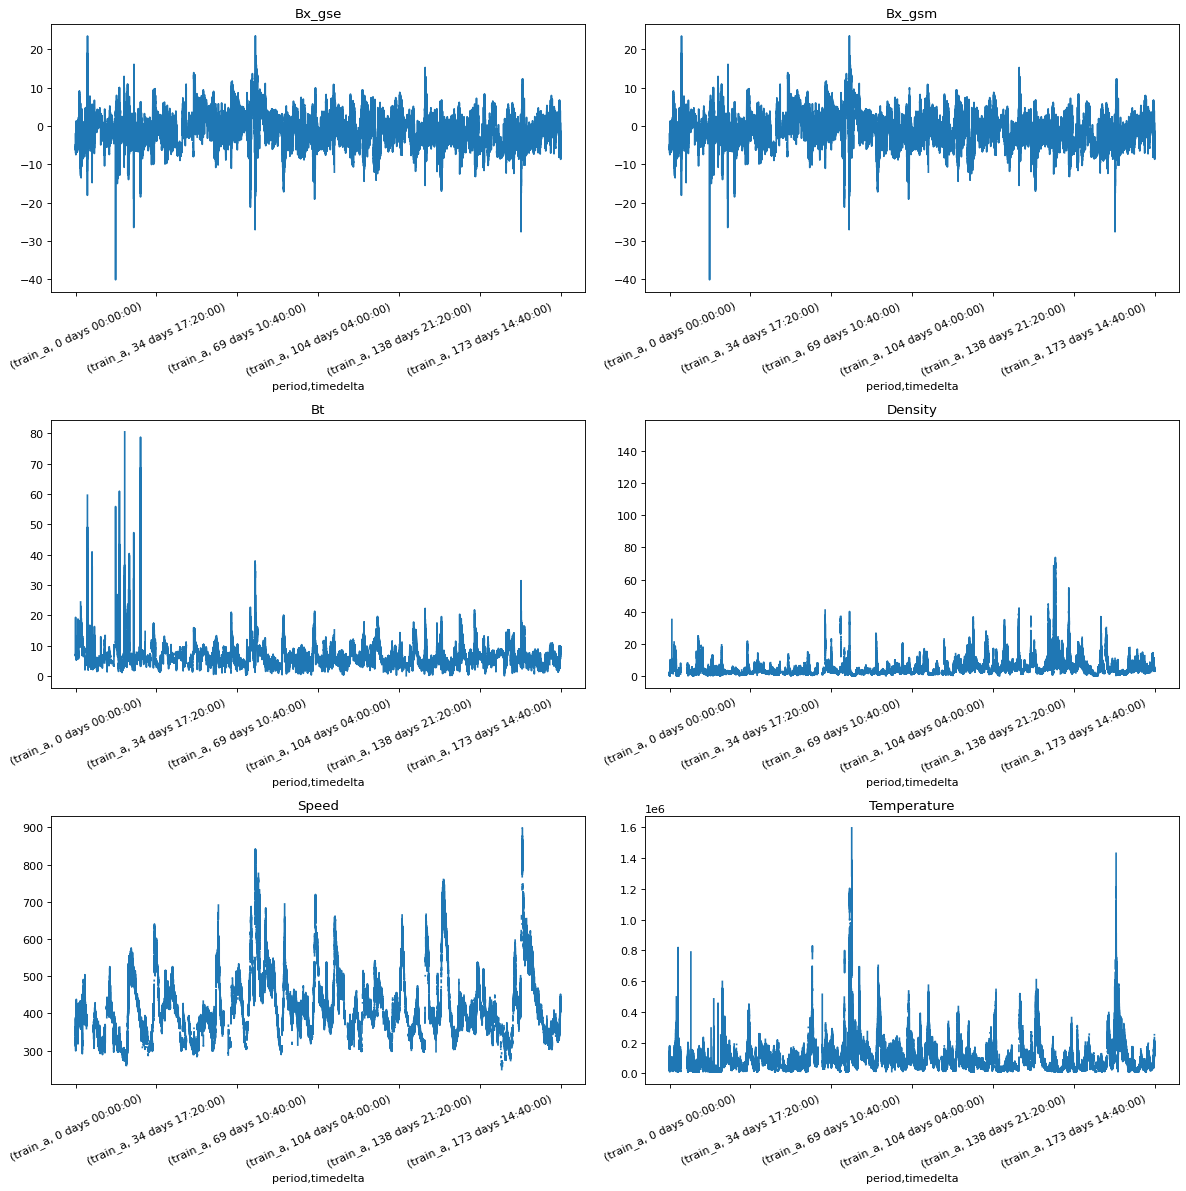

In [11]:
# Criando uma função e chamando para gerar gráficos das colunas armazenadas na variável 'cols_to_plot'
'''
Args:
      data: DataFrame pandas contendo os dados a serem visualizados.
      num_rows: Número de linhas a serem exibidas em cada gráfico. Padrão: 1000.
'''
def show_raw_visualization(data,num_rows=1000): # Visualiza os dados brutos em gráficos separados.
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key].iloc[:num_rows]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
            rot=25,
        )

    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()


cols_to_plot = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
show_raw_visualization(solar_wind_data[cols_to_plot], num_rows=300000)

In [12]:
# Verificando a quantidade de valores NaN em cada coluna do DataFrame
solar_wind_data.isna().sum()

,0
bx_gse,325888
by_gse,325888
bz_gse,325888
theta_gse,325888
phi_gse,326388
bx_gsm,325888
by_gsm,325888
bz_gsm,325888
theta_gsm,325888
phi_gsm,326388


### Sunspot

In [13]:
# Prévia do DataFrame
sunspot.head()

smoothed_ssn
period  timedelta              
train_a 0 days             65.4
        13 days            72.0
        44 days            76.9
        74 days            80.8
        105 days           85.4

In [14]:
# Agrupando por 'period' e gerando descrições após agrupar
sunspot.groupby("period").describe().T

period                 train_a     train_b    train_c
smoothed_ssn count   40.000000   72.000000  80.000000
             mean   136.902500   51.850000  24.313750
             std     34.563168   39.200266  19.020414
             min     65.400000    3.900000   2.200000
             25%    108.375000   15.325000   7.775000
             50%    151.500000   43.150000  20.500000
             75%    164.400000   91.225000  38.525000
             max    175.200000  116.400000  69.500000

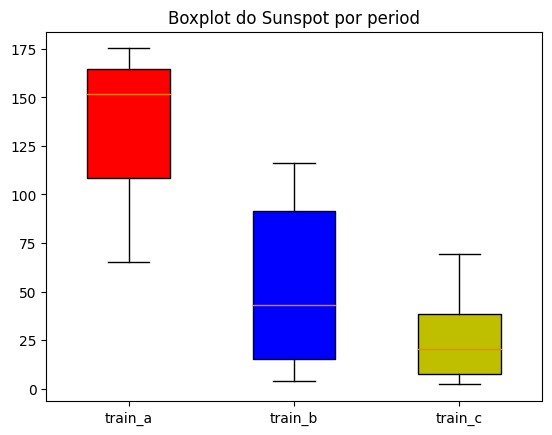

In [15]:
# Fazendo um boxplot
fig, ax = plt.subplots()
color = ["r", "b", "y"]
for i, period in enumerate(sunspot.groupby("period")):
    period_name, df = period
    ax.boxplot(df, positions=[i], widths=[0.5], patch_artist=True, boxprops=dict(facecolor=color[i]))
plt.xticks([0, 1, 2], ["train_a", "train_b", "train_c"])
plt.title("Boxplot do Sunspot por period")
plt.show()

### Satelite Posição

In [16]:
# Prévia do DataFrame
satelite_pos.head()

,period,timedelta,gse_x_ace,gse_y_ace,gse_z_ace,gse_x_dscovr,gse_y_dscovr,gse_z_dscovr
0,train_a,0 days,1522376.9,143704.6,149496.7,NaN,NaN,NaN
1,train_a,1 days,1525410.9,136108.8,151034.1,NaN,NaN,NaN
2,train_a,2 days,1528484.9,128470.5,152387.7,NaN,NaN,NaN
3,train_a,3 days,1531570.3,120818.4,153561.4,NaN,NaN,NaN
4,train_a,4 days,1534633.1,113178.5,154534.6,NaN,NaN,NaN


## Gráfico para relacionar

In [17]:
# Modificando a coluna do dataframe solar_wind_data 'source' de string para 0 -> ac , 1 -> dsc
solar_wind_data['source'] = solar_wind_data['source'].map({'ac': 0, 'dsc': 1})

<ipython-input-18-88e98217ccd3>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  corr = solar_wind_data.join(sunspot).join(labels_data).fillna(method="ffill").corr()


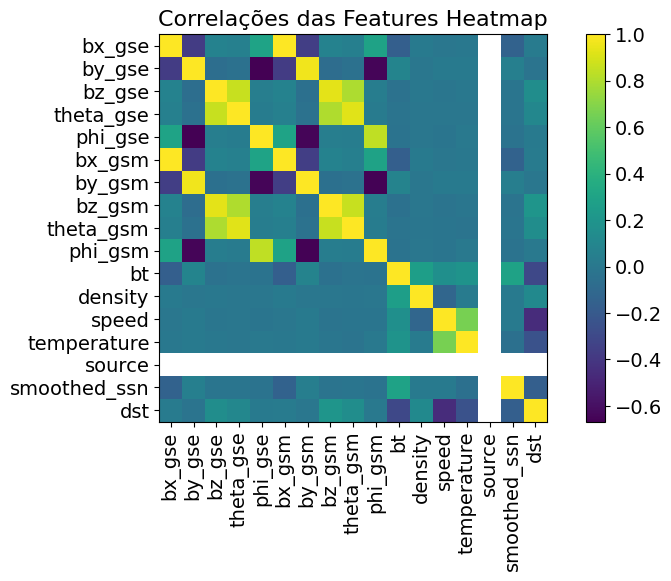

In [18]:
# Gráfico que mostra as correlações de cada coluna da junção dos DataFrames labels, solar wind e sunspots

corr = solar_wind_data.join(sunspot).join(labels_data).fillna(method="ffill").corr()

plt.figure(figsize=(10, 5))
plt.matshow(corr, fignum=1)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=90)
plt.gca().xaxis.tick_bottom()
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)


cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlações das Features Heatmap", fontsize=16)
plt.show()

##Imputação dos dados

In [19]:
# Importando mais bibliotecas
import tensorflow as tf
from numpy.random import seed
from tensorflow.random import set_seed

# Colocando seeds pré-estabelecidas
# seed(2020)
# set_seed(2021)

In [20]:
from sklearn.preprocessing import StandardScaler

# tabelas do solar wind sendo usadas
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gse",
    "by_gse",
    "bz_gse",
    "speed",
    "density",
]

#media(mean) e desvio padrao(std) para solar_wind
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)

#função para dados faltantes:
def impute_features(feature_df):
    """Impõe dados usando os seguintes métodos:
    - smoothed_ssn`: forward fill
    - solar_wind`: interpolação
    """
    #coluna smoothed_ssn metodo de limpeza: foward fill
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    #Interpolação solar_wind
    feature_df = feature_df.interpolate()
    return feature_df

#função que junta os minutos do solar wind para hora
def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """
       Agrega recursos ao andar de cada hora usando média e desvio padrão.
       por exemplo, todos os valores de "11:00:00" a "11:59:00" serão agregados a "11:00:00".
    """

    agged = feature_df.groupby(
        ["period", feature_df.index.get_level_values(1).floor("H")]
    ).agg(aggs)

    agged.columns = ["_".join(x) for x in agged.columns]
    return agged

#função que vai juntar os dataframes solar wind e sunspot
def preprocess_features(solar_wind_data, sunspot, scaler=None, subset=None):
    """
  Etapas de pré-processamento:
   - Subconjunto dos dados
   - Agregação horária
   - Unir dados de vento solar e manchas solares
   - Escala usando o scaler padrão
   - Imputar valores ausentes
    """

    if subset:
        solar_wind_data = solar_wind_data[subset]

    # chama a funçao de transformar em hora e junta solar wind e sunspot
    hourly_features = aggregate_hourly(solar_wind_data).join(sunspot)


    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features) #mean std

    #normalização dos dados e criacao do dataframe 'normalized'
    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,    #mantem o mesmo numero de colunas que o dataframe 'hourly features'''''(aggregate_hourly(solar_wind_data).join(sunspot))''''
        columns=hourly_features.columns,
    )

    # impute de dados faltantes(ffill e interpolarizacao)
    imputed = impute_features(normalized)


    return imputed, scaler


In [21]:
# Resultado da nossa nova tabela
features, scaler = preprocess_features(solar_wind_data, sunspot, subset=SOLAR_WIND_FEATURES)
print(features.shape)
features.head()

<ipython-input-20-9c39632f088a>:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ["period", feature_df.index.get_level_values(1).floor("H")]


(139872, 15)


<ipython-input-20-9c39632f088a>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")


bt_mean    bt_std  temperature_mean  \
period  timedelta                                               
train_a 0 days 00:00:00  0.499705  2.443614         -0.375267   
        0 days 01:00:00  0.547177 -0.224580         -0.479430   
        0 days 02:00:00  0.739905 -0.770240         -0.574831   
        0 days 03:00:00  0.699098 -0.278783         -0.324709   
        0 days 04:00:00  0.223933 -0.225168         -0.313432   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.599207   -0.381502   
        0 days 01:00:00         0.953178    -1.757995   -0.867747   
        0 days 02:00:00        -0.192518    -1.912116   -1.114317   
        0 days 03:00:00         0.325491    -1.809045   -0.783042   
        0 days 04:00:00         0.201600    -1.338802   -0.484910   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
        0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
        0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
        0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
        0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   
        0 days 03:00:00   -0.826469  -0.211185     -0.404306     0.218373   
        0 days 04:00:00   -0.601238   1.016033     -0.371487     0.097253   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444  
        0 days 03:00:00      0.139444  
        0 days 04:00:00      0.139444

In [22]:
# Checando para ver se existem dados faltantes após o tratamento
assert (features.isna().sum() == 0).all()

### Juntando todos os dataframe

In [23]:
labels_data.head()

dst
period  timedelta           
train_a 0 days 00:00:00   -7
        0 days 01:00:00  -10
        0 days 02:00:00  -10
        0 days 03:00:00   -6
        0 days 04:00:00   -2

In [24]:
# Troca de nomes, dst = t0 e dst + 1(hora) = t1
YCOLS = ["t0", "t1"]


def process_labels(dst):
    y = dst.copy()
    y["t0"] = y.groupby("period").dst.shift(-1)
    y["t1"] = y.groupby("period").dst.shift(-2)
    return y[YCOLS]


labels = process_labels(labels_data)
labels.head()

t0    t1
period  timedelta                  
train_a 0 days 00:00:00 -10.0 -10.0
        0 days 01:00:00 -10.0  -6.0
        0 days 02:00:00  -6.0  -2.0
        0 days 03:00:00  -2.0   3.0
        0 days 04:00:00   3.0   5.0

In [25]:
# Juntando tabelas dos dois DataFrames
data = labels.join(features)
data.head()

t0    t1   bt_mean    bt_std  temperature_mean  \
period  timedelta                                                           
train_a 0 days 00:00:00 -10.0 -10.0  0.499705  2.443614         -0.375267   
        0 days 01:00:00 -10.0  -6.0  0.547177 -0.224580         -0.479430   
        0 days 02:00:00  -6.0  -2.0  0.739905 -0.770240         -0.574831   
        0 days 03:00:00  -2.0   3.0  0.699098 -0.278783         -0.324709   
        0 days 04:00:00   3.0   5.0  0.223933 -0.225168         -0.313432   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.599207   -0.381502   
        0 days 01:00:00         0.953178    -1.757995   -0.867747   
        0 days 02:00:00        -0.192518    -1.912116   -1.114317   
        0 days 03:00:00         0.325491    -1.809045   -0.783042   
        0 days 04:00:00         0.201600    -1.338802   -0.484910   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
        0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
        0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
        0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
        0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   
        0 days 03:00:00   -0.826469  -0.211185     -0.404306     0.218373   
        0 days 04:00:00   -0.601238   1.016033     -0.371487     0.097253   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444  
        0 days 03:00:00      0.139444  
        0 days 04:00:00      0.139444

# Divisão dos dados

In [26]:
# Inicio da criação do modelo

'''
Dividir os dados em conjuntos de treinamento, teste e validação.

    A função divide os dados em períodos de tempo e aloca uma
    porcentagem de cada período para os conjuntos de teste e validação.

'''

def get_train_test_val(data, test_per_period, val_per_period):

    test = data.groupby("period").tail(test_per_period)
    interim = data[~data.index.isin(test.index)]

    val = interim.groupby("period").tail(val_per_period)

    train = interim[~interim.index.isin(val.index)]
    return train, test, val


train, test, val = get_train_test_val(data, test_per_period=6_000, val_per_period=3_000)

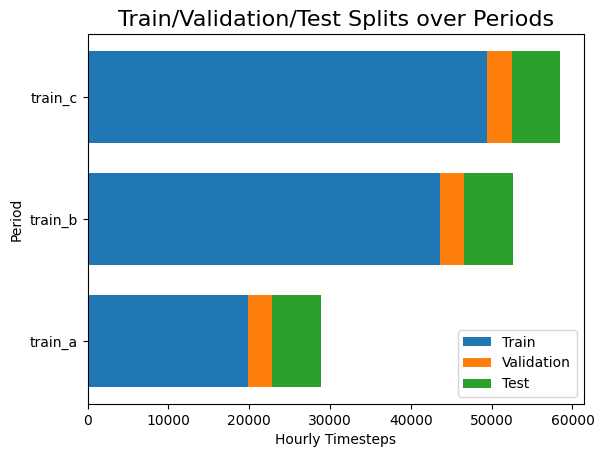

In [27]:
# Gráfico da divisão Treino, Teste, Validação
ind = [0, 1, 2]
names = ["train_a", "train_b", "train_c"]
width = 0.75
train_cnts = [len(df) for _, df in train.groupby("period")]
val_cnts = [len(df) for _, df in val.groupby("period")]
test_cnts = [len(df) for _, df in test.groupby("period")]

p1 = plt.barh(ind, train_cnts, width)
p2 = plt.barh(ind, val_cnts, width, left=train_cnts)
p3 = plt.barh(ind, test_cnts, width, left=np.add(val_cnts, train_cnts).tolist())

plt.yticks(ind, names)
plt.ylabel("Period")
plt.xlabel("Hourly Timesteps")
plt.title("Train/Validation/Test Splits over Periods", fontsize=16)
plt.legend(["Train", "Validation", "Test"])

In [28]:
print(train.shape) #Verificando o tamanho do treino.
train.head()

(112872, 17)


t0    t1   bt_mean    bt_std  temperature_mean  \
period  timedelta                                                           
train_a 0 days 00:00:00 -10.0 -10.0  0.499705  2.443614         -0.375267   
        0 days 01:00:00 -10.0  -6.0  0.547177 -0.224580         -0.479430   
        0 days 02:00:00  -6.0  -2.0  0.739905 -0.770240         -0.574831   
        0 days 03:00:00  -2.0   3.0  0.699098 -0.278783         -0.324709   
        0 days 04:00:00   3.0   5.0  0.223933 -0.225168         -0.313432   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.599207   -0.381502   
        0 days 01:00:00         0.953178    -1.757995   -0.867747   
        0 days 02:00:00        -0.192518    -1.912116   -1.114317   
        0 days 03:00:00         0.325491    -1.809045   -0.783042   
        0 days 04:00:00         0.201600    -1.338802   -0.484910   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
        0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
        0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
        0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
        0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   
        0 days 03:00:00   -0.826469  -0.211185     -0.404306     0.218373   
        0 days 04:00:00   -0.601238   1.016033     -0.371487     0.097253   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444  
        0 days 03:00:00      0.139444  
        0 days 04:00:00      0.139444

In [29]:
print(test.shape) #Verificando o tamanho do teste
test.head()

(18000, 17)


t0   t1   bt_mean    bt_std  temperature_mean  \
period  timedelta                                                           
train_a 951 days 00:00:00 -9.0 -9.0 -0.750759  0.234958         -0.321374   
        951 days 01:00:00 -9.0 -6.0 -0.791318  0.284752         -0.319784   
        951 days 02:00:00 -6.0 -7.0 -0.980331  0.573975         -0.257948   
        951 days 03:00:00 -7.0 -7.0 -1.043536 -0.412378         -0.209809   
        951 days 04:00:00 -7.0 -9.0 -0.993770 -0.603035         -0.189010   

                           temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                     
train_a 951 days 00:00:00        -0.263304     0.437479   -0.443221   
        951 days 01:00:00        -0.301259     0.321370    0.422124   
        951 days 02:00:00        -0.344924     0.530721    0.818555   
        951 days 03:00:00        -0.397676     0.753977   -0.432534   
        951 days 04:00:00        -0.402766     0.789420   -0.391195   

                           by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                             
train_a 951 days 00:00:00    -0.202748    0.318096     0.849393   -0.020478   
        951 days 01:00:00    -0.240443    0.166232     0.776471   -0.220270   
        951 days 02:00:00    -0.137579    0.157993     0.147218   -0.276363   
        951 days 03:00:00    -0.157578   -0.430909     0.121454   -0.282263   
        951 days 04:00:00    -0.252788   -0.372368    -0.149991   -0.510691   

                           speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                             
train_a 951 days 00:00:00   -0.145924  -0.503193     -0.407614    -0.315154   
        951 days 01:00:00   -0.127991  -0.084971     -0.427620    -0.198320   
        951 days 02:00:00   -0.120626  -0.310757     -0.435274    -0.374498   
        951 days 03:00:00   -0.180313  -0.531222     -0.414209    -0.365694   
        951 days 04:00:00   -0.219717  -0.649039     -0.437909    -0.267683   

                           smoothed_ssn  
period  timedelta                        
train_a 951 days 00:00:00      2.113449  
        951 days 01:00:00      2.113449  
        951 days 02:00:00      2.113449  
        951 days 03:00:00      2.113449  
        951 days 04:00:00      2.113449

In [30]:
print(val.shape) #Verificando o tamanho da validação
val.head()

(9000, 17)


t0   t1   bt_mean    bt_std  temperature_mean  \
period  timedelta                                                           
train_a 826 days 00:00:00  8.0  8.0  0.947600 -0.229038         -0.473006   
        826 days 01:00:00  8.0  9.0  0.464361  0.276422          0.316358   
        826 days 02:00:00  9.0  8.0  0.273709  0.197794          0.073052   
        826 days 03:00:00  8.0  8.0  0.078250  0.445950          0.290167   
        826 days 04:00:00  8.0  8.0 -0.172001  0.071668          0.336941   

                           temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                     
train_a 826 days 00:00:00        -0.372466    -1.575773   -0.882804   
        826 days 01:00:00         0.379133    -1.614668   -0.280527   
        826 days 02:00:00         0.302776    -1.130185    0.809654   
        826 days 03:00:00         0.460514    -0.943295    1.891776   
        826 days 04:00:00         0.437184    -0.771915    0.408708   

                           by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                             
train_a 826 days 00:00:00     0.097349    1.132243     1.867509   -0.274071   
        826 days 01:00:00     0.397057    0.655653     0.530847    0.238450   
        826 days 02:00:00     0.320615    0.122597    -1.297872   -0.367564   
        826 days 03:00:00    -0.062777   -0.024515    -0.681155    1.253984   
        826 days 04:00:00     0.332551   -0.049795    -0.704262    1.021870   

                           speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                             
train_a 826 days 00:00:00   -0.323757  -0.527592      0.392352    -0.296261   
        826 days 01:00:00   -0.155733   0.142157      0.022523    -0.150077   
        826 days 02:00:00   -0.072557   0.563556     -0.200011    -0.089490   
        826 days 03:00:00   -0.001116   0.127350      0.135548     0.048349   
        826 days 04:00:00    0.063829   0.143625     -0.027986    -0.066235   

                           smoothed_ssn  
period  timedelta                        
train_a 826 days 00:00:00      2.191722  
        826 days 01:00:00      2.191722  
        826 days 02:00:00      2.191722  
        826 days 03:00:00      2.191722  
        826 days 04:00:00      2.191722

# Construindo o modelo

In [31]:
# Configurando o Modelo LSTM
from keras import preprocessing


data_config = { #armazenar as configurações dos dados
    "timesteps": 32, # Define o tamanho da janela de tempo
    "batch_size": 32, # Define o tamanho dos lotes de dados que serão alimentados ao modelo durante o treinamento.
}


def timeseries_dataset_from_df(df, batch_size):
    dataset = None # irá armazenar o conjunto de dados de séries temporais completo.
    timesteps = data_config["timesteps"]


    for _, period_df in df.groupby("period"):

        inputs = period_df[XCOLS][:-timesteps] # Seleciona as colunas de entrada
        outputs = period_df[YCOLS][timesteps:] # Seleciona as colunas de saída

        period_ds = preprocessing.timeseries_dataset_from_array(
            inputs,
            outputs,
            timesteps,
            batch_size=batch_size,
        )

        if dataset is None:
            dataset = period_ds
        else:
            dataset = dataset.concatenate(period_ds)

    return dataset # Retorna o conjunto de dados de séries temporais completo.


train_ds = timeseries_dataset_from_df(train, data_config["batch_size"])
val_ds = timeseries_dataset_from_df(val, data_config["batch_size"])

print(f"Number of train batches: {len(train_ds)}")
print(f"Number of val batches: {len(val_ds)}")

Number of train batches: 3523
Number of val batches: 276


In [32]:
from keras.optimizers import RMSprop
from keras.layers import Dense, LSTM
from keras.models import Sequential
import numpy as np

model_config = {"n_epochs": 15, "n_neurons": 512, "dropout": 0.4, "stateful": False} # Definindo o número de épocas, neurons, dropout

model = Sequential()
model.add(
    LSTM(
        model_config["n_neurons"],
        input_shape=(data_config["timesteps"], len(XCOLS)),
        stateful=model_config["stateful"],
        dropout=model_config["dropout"],))

model.add(Dense(len(YCOLS)))
#Inicializar o otimizador RMSprop
optimizer = RMSprop(learning_rate=0.001)  # Você pode ajustar a taxa de aprendizado aqui
#Compilar o modelo com o otimizador RMSprop
model.compile(
    loss="mean_squared_error", # RMSE
    optimizer=optimizer, # Passar o otimizador RMSprop aqui
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 512)                 │       1,081,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,082,370 (4.13 MB)

 Trainable params: 1,082,370 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

# Treinando o modelo

In [33]:
history = model.fit(
    train_ds,
    batch_size=data_config["batch_size"],
    epochs=model_config["n_epochs"],
    verbose=1,
    shuffle=False,
    validation_data=val_ds,
)


Epoch 1/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 43s 10ms/step - loss: 340.6381 - val_loss: 497.9731
Epoch 2/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - loss: 270.9088 - val_loss: 471.5891
Epoch 3/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - loss: 255.3459 - val_loss: 447.5183
Epoch 4/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - loss: 240.8623 - val_loss: 440.2870
Epoch 5/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - loss: 238.9008 - val_loss: 409.9279
Epoch 6/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - loss: 230.1596 - val_loss: 409.2592
Epoch 7/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 230.6589 - val_loss: 412.2248
Epoch 8/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 228.1426 - val_loss: 398.2935
Epoch 9/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - loss: 225.0208 - val_loss: 385.5779
Epoch 10/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - loss: 220.3998 - val_loss: 391.3815
Epoch 11/15
3523/3523 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - 

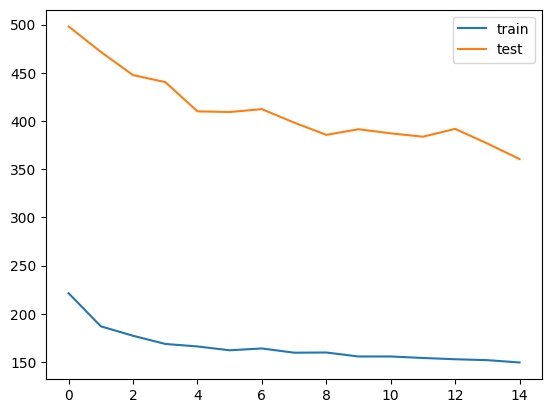

In [34]:
#Gráfico para Avaliação das épocas

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [35]:
test_ds = timeseries_dataset_from_df(test, data_config["batch_size"]) #criar conjuntos de dados de séries temporais a partir de um DataFrame

In [36]:
mse = model.evaluate(test_ds)
print(f"Test RMSE: {mse**.5:.2f}")

558/558 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 548.6812
Test RMSE: 18.31


In [37]:
import json
import pickle

model.save("model.keras") #Salvar o modelo

with open("scaler.pck", "wb") as f:
    pickle.dump(scaler, f)

data_config["solar_wind_subset"] = SOLAR_WIND_FEATURES
print(data_config)
with open("config.json", "w") as f:
    json.dump(data_config, f)

{'timesteps': 32, 'batch_size': 32, 'solar_wind_subset': ['bt', 'temperature', 'bx_gse', 'by_gse', 'bz_gse', 'speed', 'density']}


<ipython-input-43-5cc279e74d03>:61: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  agged = feature_df.groupby([feature_df.index.floor("H")]).agg(aggs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


<ipython-input-43-5cc279e74d03>:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")


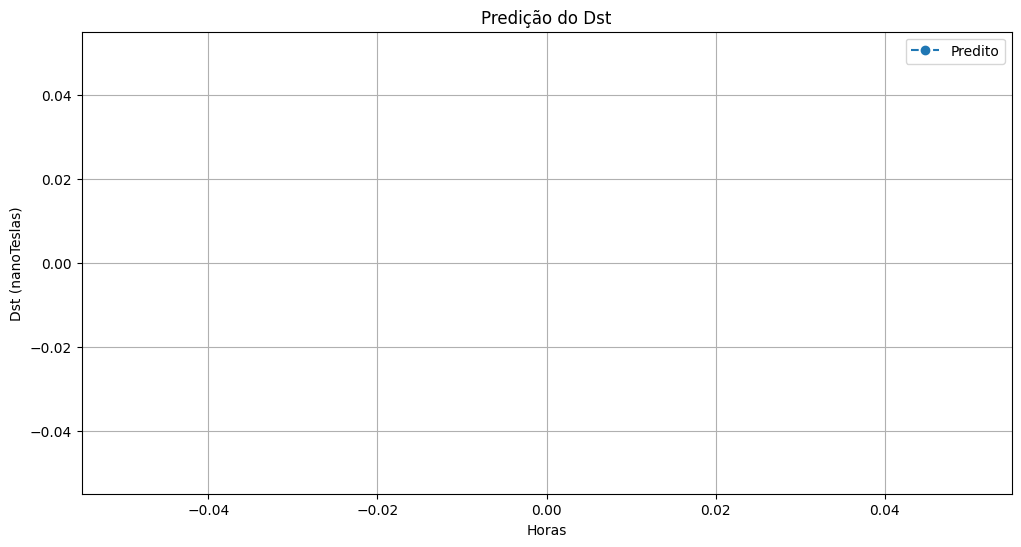

In [43]:
import json
import pickle
from typing import Tuple

import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar modelo serializado, config e scaler
model = keras.models.load_model("model.keras")

with open("config.json", "r") as f:
    CONFIG = json.load(f)

with open("scaler.pck", "rb") as f:
    scaler = pickle.load(f)

# Definir variáveis ​​globais
TIMESTEPS = CONFIG["timesteps"]
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gse",
    "by_gse",
    "bz_gse",
    "speed",
    "density",
]
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)


# Definir funções para pré-processamento
def impute_features(feature_df):
    """Imputes data using the following methods:
    - `smoothed_ssn`: forward fill
    - `solar_wind`: interpolation
    """
    # preencher dados de manchas solares para o resto do mês
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    # interpolar entre valores de vento solar ausentes
    feature_df = feature_df.interpolate()
    return feature_df


def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates features to the floor of each hour using mean and standard deviation.
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    """

    # Convert the index to TimedeltaIndex if it's not already
    if not isinstance(feature_df.index, pd.TimedeltaIndex):
        feature_df.index = pd.to_timedelta(feature_df.index)

    # agrupar pelo andar de cada hora usar índice timedelta
    agged = feature_df.groupby([feature_df.index.floor("H")]).agg(aggs)

    # achatar índice de coluna hierárquica
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


def preprocess_features(solar_wind_data, sunspot, scaler=None, subset=None):
    """
    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
    """
    # selecionar recursos que queremos usar
    if subset:
        solar_wind_data = solar_wind_data[subset]

    # agregar dados do vento solar e juntar com manchas solares
    hourly_features = aggregate_hourly(solar_wind_data).join(sunspot)

    # subtrair a média e dividir pelo desvio padrão
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # imputar valores ausentes
    imputed = impute_features(normalized)

    # queremos retornar o objeto scaler também para usar mais tarde durante a previsão
    return imputed, scaler

#Coletar dados de entrada
solar_wind_data_7d = pd.read_csv("solar_wind.csv", index_col="timedelta")
satellite_positions_7d = pd.read_csv("satellite_pos.csv", index_col="timedelta")
latest_sunspot_number = 150

# Definir função de previsão
def predict_dst(
    solar_wind_data_7d: pd.DataFrame,
    satellite_positions_7d: pd.DataFrame,
    latest_sunspot_number: float,
) -> Tuple[float, float]:
    """
    Pegar todos os dados até o tempo t-1 e faça previsões para
    os tempos t e t+1.
    Parâmetros
    ----------
    solar_wind_7d: pd.DataFrame
    Os últimos 7 dias de dados de satélite até (t - 1) minutos [excluindo t]
    satellite_positions_7d: pd.DataFrame
    Os últimos 7 dias de dados de posição de satélite até o tempo presente [incluindo t]
    latest_sunspot_number: float
    O último número mensal de manchas solares (SSN) disponível
    Retorna
    -------
    predictions : Tuple[float, float]
    Uma tupla de duas previsões, para (t e t + 1 hora) respectivamente; elas devem
    estar entre -2.000 e 500.
    """
    # Reformatar dados para caber em nosso pipeline
    sunspot = pd.DataFrame(index=solar_wind_data_7d.index, columns=["smoothed_ssn"])
    sunspot["smoothed_ssn"] = latest_sunspot_number

    # Processando nossos recursos e capturando as últimas 32 (passos de tempo) horas
    features, s = preprocess_features(
        solar_wind_data_7d, sunspot, scaler=scaler, subset=SOLAR_WIND_FEATURES
    )
    model_input = features[-TIMESTEPS:][XCOLS].values.reshape(
        (1, TIMESTEPS, features.shape[1])
    )

    # Fazendo uma previsão
    prediction_at_t0, prediction_at_t1 = model.predict(model_input)[0]

    return prediction_at_t0, prediction_at_t1

# Fazer a predição
prediction_at_t0, prediction_at_t1 = predict_dst(
    solar_wind_data_7d, satellite_positions_7d, latest_sunspot_number
)

# Assuming 'solar_wind_data_7d' has a 'dst' column
# you may need to adjust this based on the actual DataFrame structure



# Plotar o gráfico
plt.figure(figsize=(12, 6))
# Remover esta linha: plt.plot(np.arange(0, 32), observed_dst, label="Observado")
plt.plot(
    np.arange(32, 34),
    [prediction_at_t0, prediction_at_t1],
    label="Predito",
    marker="o",
    linestyle="--",
)
plt.xlabel("Horas")
plt.ylabel("Dst (nanoTeslas)")
plt.title("Predição do Dst")
plt.legend()
plt.grid(True)
plt.show()